In [1]:
%cd ..

/home/tianshu/Documents/dart


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from dart import DartResult
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
def plot_map(fig, ax, mapfile, traj, layers=(80, 120), key="sigma"):
    squash = np.mean(mapfile[key][:, :, layers[0]:layers[1]], axis=2)
    if key == "alpha":
        squash = np.exp(squash)
    else:
        lower, upper = np.percentile(squash, (1, 99))
        squash = np.clip(squash, max(lower, 0.0), upper)

    xmin, ymin, zmin = mapfile["lower"].reshape(-1)
    xmax, ymax, zmax = mapfile["upper"].reshape(-1)

    ims = ax.imshow(
        np.rot90(squash, k=1), extent=[xmin, xmax, ymin, ymax], aspect='equal')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    fig.colorbar(ims, cax)

    ax.plot(traj[:, 0], traj[:, 1], color='red')


def plot_maps(path, layers=(80, 120), checkpoint="map.h5"):
    result = DartResult(path)
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    mapfile = result.load(checkpoint)
    traj = result.data(["pos"])["pos"]

    plot_map(fig, axs[0], mapfile, traj, layers=layers, key="sigma")
    plot_map(fig, axs[1], mapfile, traj, layers=layers, key="alpha")

    for ax in axs:
        ax.grid()
    fig.suptitle(path)
    fig.tight_layout()
    return fig, axs

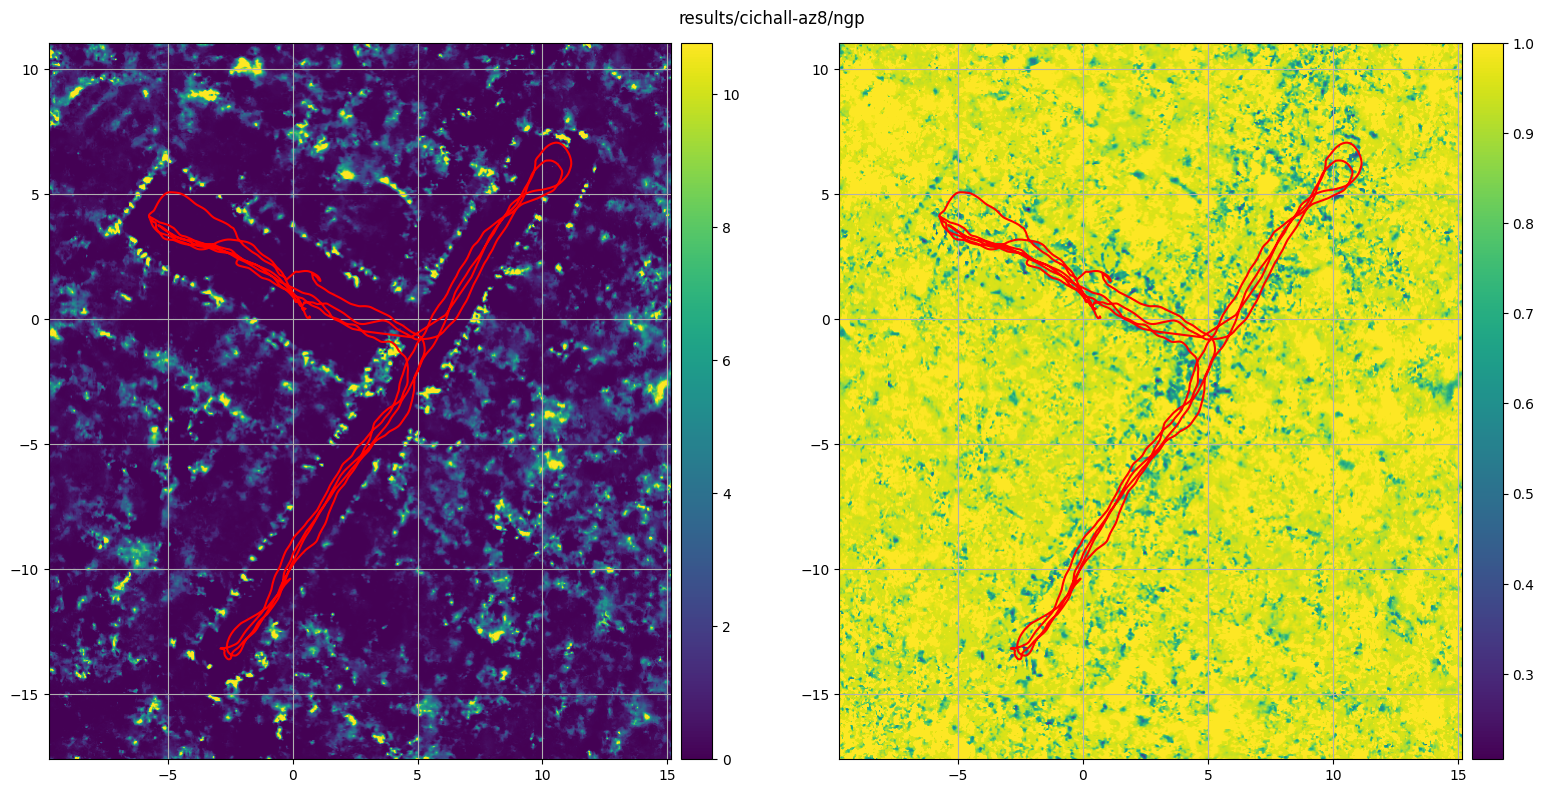

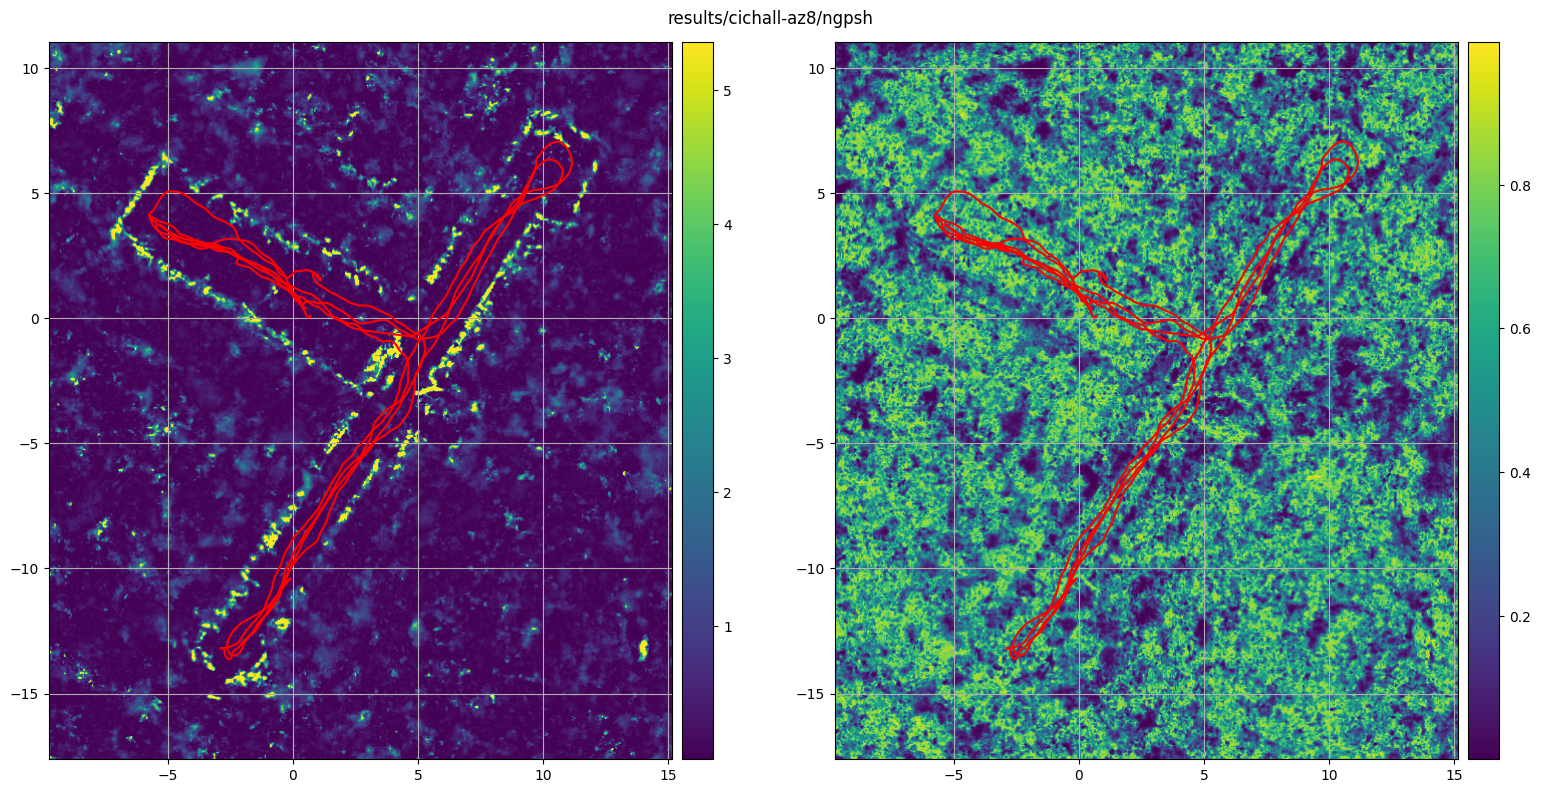

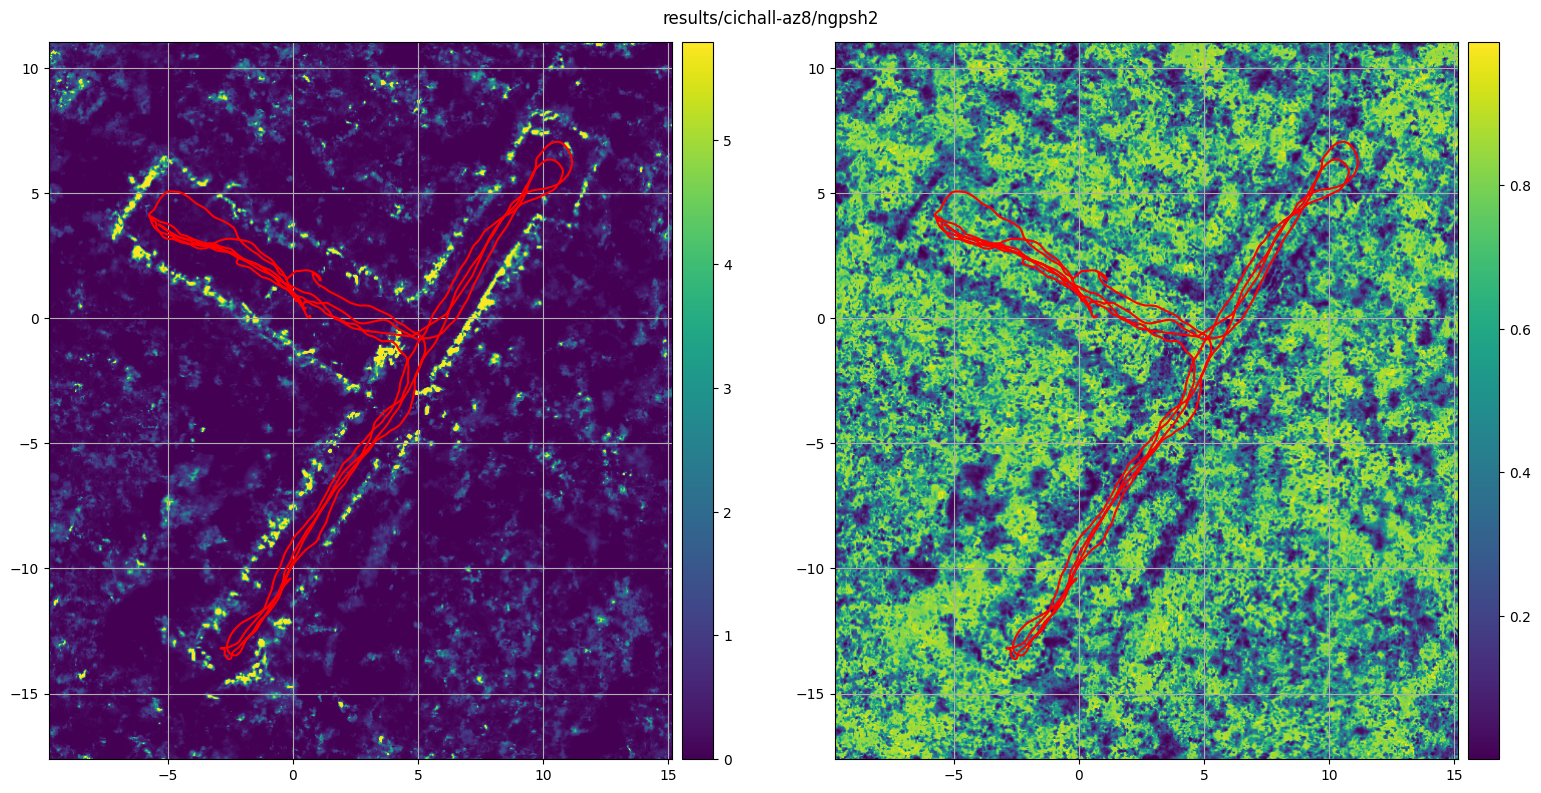

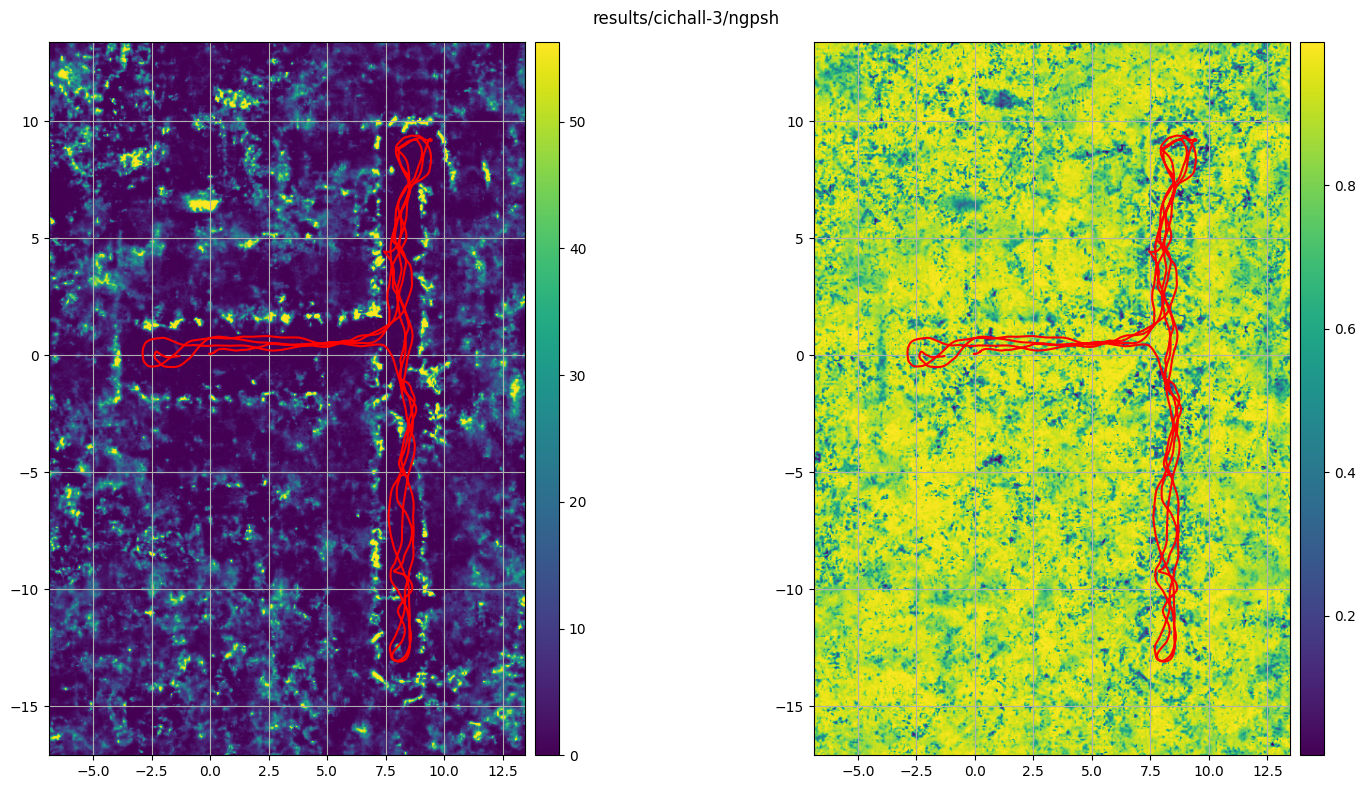

In [5]:
layers = (48, 49)
fig, axs = plot_maps("results/cichall-az8/ngp", layers=layers)
fig, axs = plot_maps("results/cichall-az8/ngpsh", layers=layers)
fig, axs = plot_maps("results/cichall-az8/ngpsh2", layers=layers)
fig, axs = plot_maps("results/cichall-3/ngpsh", layers=layers)